# Two categories of Data Analytics

- Predict unknown or future data from what we already know (regression, classification)
- Find previously unknown patterns in the data (data mining)


# CRISP - DM

1. Business Understanding
2. Data Understanding - EDA (eg. Collect initial data, describe data, explore data, verify data quality)
3. Data Preparation - Feature Engineering (feature selection, cleaning data, feature scaling)
4. Modelling
5. Evaluation
6. Deployment

# 1. Business Understanding

## Objectives
- explore interesting, actionable trends of past data breaches
- predict various aspects of future data breaches

# 2. Data Understanding - EDA

## Diagnostic questions

2 types of data pathologies
- Data Content
- Formatting issues

### Data content

- Duplicate entries
- Multiple entries for a single entity
- Missing entries
- NULLs - Ask why there are NULL entries? eg. purposefully not collect data at some factories
- Huge outliers
- Out-of-date data
- Artificial entries

### Formatting issues

- Formatting is Irregular between different tables/columns
- Extra whitespace in text string
- Irregular capitalisation
- Inconsistent delimiters
- Irregular Null formnat eg. "", NA, NULL, unavailable, unknown
- Invalid characters eg. s = 'abc\xFF'
- Weird or incompatible datetimes

## Import dependencies

In [87]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as stats

## Load dataset

In [88]:
df = pd.read_csv("databreaches650.csv")

## Overview

In [89]:
df.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45,2017-12-10 21:44:27,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50,2020-11-15 01:07:10,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False
2,126,126,126.com,2012-01-01,2016-10-08 07:46:05,2016-10-08 07:46:05,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False
3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03,2016-07-08 01:55:03,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",True,False,False,False,False,False
4,17173,17173,17173.com,2011-12-28,2018-04-28 04:53:15,2018-04-28 04:53:15,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",False,False,False,False,False,False


In [90]:
df.tail()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware
645,Zurich,Zurich,zurich.co.jp,2023-01-08,2023-01-22 22:30:56,2023-01-22 22:30:56,756737,"In January 2023, <a href=""https://therecord.me...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False
646,Zynga,Zynga,zynga.com,2019-09-01,2019-12-19 04:54:45,2020-01-11 00:41:51,172869660,"In September 2019, game developer <a href=""htt...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Phone number...",True,False,False,False,False,False
647,Parapa,ÐŸÐ°Ñ€Ð° ÐŸÐ°,parapa.mail.ru,2016-08-08,2016-12-28 07:03:17,2016-12-28 07:03:17,4946850,"In August 2016, <a href=""http://www.zdnet.com/...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",True,False,False,False,False,False
648,SprashivaiRu,Ð¡Ð¿Ñ€Ð°ÑˆÐ¸Ð²Ð°Ð¹.Ñ€Ñƒ,sprashivai.ru,2015-05-11,2015-05-12 23:50:08,2015-05-12 23:50:08,3474763,"In May 2015, <a href=""http://sprashivai.ru/"" t...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False
649,DecoratingTheHouse,ì§‘ê¾¸ë¯¸ê¸°,ggumim.co.kr,2020-03-27,2020-08-02 05:34:42,2020-08-02 05:34:42,1298651,"In March 2020, the Korean interior decoration ...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Names', 'Phone numbers', ...",True,False,False,False,False,False


## Check data quality for missing values

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          650 non-null    object
 1   Title         650 non-null    object
 2   Domain        624 non-null    object
 3   BreachDate    650 non-null    object
 4   AddedDate     650 non-null    object
 5   ModifiedDate  650 non-null    object
 6   PwnCount      650 non-null    int64 
 7   Description   650 non-null    object
 8   LogoPath      650 non-null    object
 9   DataClasses   650 non-null    object
 10  IsVerified    650 non-null    bool  
 11  IsFabricated  650 non-null    bool  
 12  IsSensitive   650 non-null    bool  
 13  IsRetired     650 non-null    bool  
 14  IsSpamList    650 non-null    bool  
 15  IsMalware     650 non-null    bool  
dtypes: bool(6), int64(1), object(9)
memory usage: 54.7+ KB


### Observation
- Only column Domain has 26 null values.
- Only one column PwnCount has ratio data, datatype = int
- There are 6 columns with bool data ie. 6 nominal/categorical data columns
- The date columns has datatype being 'object' ie. string and not 'datetime'

## Check data uniqueness & values

In [92]:
df.columns

Index(['Name', 'Title', 'Domain', 'BreachDate', 'AddedDate', 'ModifiedDate',
       'PwnCount', 'Description', 'LogoPath', 'DataClasses', 'IsVerified',
       'IsFabricated', 'IsSensitive', 'IsRetired', 'IsSpamList', 'IsMalware'],
      dtype='object')

In [93]:
# Check uniqueness in each column
for col in df.columns:
    print(col, len(df[col].unique())) # Or print out df[col].unique()

Name 650
Title 650
Domain 609
BreachDate 540
AddedDate 646
ModifiedDate 641
PwnCount 649
Description 650
LogoPath 608
DataClasses 341
IsVerified 2
IsFabricated 2
IsSensitive 2
IsRetired 2
IsSpamList 2
IsMalware 2


### Observation

- Ignore Name and Title columns as each record is unique ie. these columns can't be used as feature data

### Check for duplicates in Domain column

In [94]:
duplicateDomain = df[df.duplicated(subset=['Domain'], keep=False)]
duplicateDomain

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware
5,2844Breaches,"2,844 Separate Data Breaches",NaN,2018-02-19,2018-02-26 10:06:02,2018-02-26 10:06:02,80115532,"In February 2018, <a href=""https://www.troyhun...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False
11,Abandonia,Abandonia (2015),abandonia.com,2015-11-01,2017-06-05 05:56:47,2022-12-07 05:56:07,776125,"In November 2015, the gaming website dedicated...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords...",True,False,False,False,False,False
12,Abandonia2022,Abandonia (2022),abandonia.com,2022-11-15,2022-12-07 06:04:17,2022-12-11 12:25:07,919790,"In November 2022, the gaming website dedicated...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords...",True,False,False,False,False,False
20,AdultFriendFinder,Adult FriendFinder (2015),adultfriendfinder.com,2015-05-21,2015-05-22 06:03:44,2020-02-07 01:11:13,3867997,"In May 2015, the adult hookup site <a href=""ht...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,True,False,False,False
21,AdultFriendFinder2016,Adult FriendFinder (2016),adultfriendfinder.com,2016-10-16,2020-02-06 23:53:53,2020-02-07 01:11:28,169746810,"In October 2016, the adult entertainment compa...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Spoken langu...",True,False,True,False,False,False
38,AntiPublic,Anti Public Combo List,NaN,2016-12-16,2017-05-04 22:07:38,2017-05-04 22:07:38,457962538,"In December 2016, a huge list of email address...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False
56,B2BUSABusinesses,B2B USA Businesses,NaN,2017-07-18,2017-07-18 07:38:04,2017-07-18 07:38:04,105059554,"In mid-2017, a spam list of over 105 million i...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Employers', 'Job titles',...",True,False,False,False,True,False
64,Bell,Bell (2014 breach),bell.ca,2014-02-01,2014-02-01 23:57:10,2014-02-01 23:57:10,20902,"In February 2014, <a href=""http://news.softped...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Credit cards', 'Genders', 'Passwords', 'User...",True,False,False,False,False,False
65,Bell2017,Bell (2017 breach),bell.ca,2017-05-15,2017-05-16 01:49:31,2017-05-16 01:49:31,2231256,"In May 2017, <a href=""http://www.cbc.ca/beta/n...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Geographic locations', 'I...",True,False,False,False,False,False
73,BTSec,Bitcoin Security Forum Gmail Dump,forum.btcsec.com,2014-01-09,2014-09-10 20:30:11,2014-09-10 20:30:11,4789599,"In September 2014, a large dump of nearly 5M u...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",True,False,False,False,False,False


In [95]:
duplicateDomain.shape

(57, 16)

In [96]:
# Show rows with duplicated domain
duplicateDomain[~duplicateDomain['Domain'].isnull()]

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware
11,Abandonia,Abandonia (2015),abandonia.com,2015-11-01,2017-06-05 05:56:47,2022-12-07 05:56:07,776125,"In November 2015, the gaming website dedicated...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords...",True,False,False,False,False,False
12,Abandonia2022,Abandonia (2022),abandonia.com,2022-11-15,2022-12-07 06:04:17,2022-12-11 12:25:07,919790,"In November 2022, the gaming website dedicated...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords...",True,False,False,False,False,False
20,AdultFriendFinder,Adult FriendFinder (2015),adultfriendfinder.com,2015-05-21,2015-05-22 06:03:44,2020-02-07 01:11:13,3867997,"In May 2015, the adult hookup site <a href=""ht...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,True,False,False,False
21,AdultFriendFinder2016,Adult FriendFinder (2016),adultfriendfinder.com,2016-10-16,2020-02-06 23:53:53,2020-02-07 01:11:28,169746810,"In October 2016, the adult entertainment compa...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Spoken langu...",True,False,True,False,False,False
64,Bell,Bell (2014 breach),bell.ca,2014-02-01,2014-02-01 23:57:10,2014-02-01 23:57:10,20902,"In February 2014, <a href=""http://news.softped...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Credit cards', 'Genders', 'Passwords', 'User...",True,False,False,False,False,False
65,Bell2017,Bell (2017 breach),bell.ca,2017-05-15,2017-05-16 01:49:31,2017-05-16 01:49:31,2231256,"In May 2017, <a href=""http://www.cbc.ca/beta/n...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Geographic locations', 'I...",True,False,False,False,False,False
73,BTSec,Bitcoin Security Forum Gmail Dump,forum.btcsec.com,2014-01-09,2014-09-10 20:30:11,2014-09-10 20:30:11,4789599,"In September 2014, a large dump of nearly 5M u...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",True,False,False,False,False,False
102,CardingMafiaDec2021,Carding Mafia (December 2021),cardmafia.cc,2021-12-28,2022-01-16 00:04:04,2022-01-16 00:04:04,303877,"In December 2021, the Carding Mafia forum suff...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords...",True,False,True,False,False,False
103,CardingMafia,Carding Mafia (March 2021),cardmafia.cc,2021-03-18,2021-03-23 05:00:29,2022-01-15 23:30:24,297744,"In March 2021, the Carding Mafia forum suffere...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords...",True,False,True,False,False,False
119,ClubPenguinRewritten,Club Penguin Rewritten (January 2018),cprewritten.net,2018-01-21,2019-04-23 05:05:16,2019-07-30 14:05:55,1688176,"In January 2018, the children's gaming site <a...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords...",True,False,False,False,False,False


It seems that where there are duplicated domain names, each refers to a distinct breach of different date, so we can keep the duplicated domain entries.

In [97]:
df['IsRetired'].unique()

array([False,  True])

In [98]:
df['IsRetired'].value_counts()

False    649
True       1
Name: IsRetired, dtype: int64

## EDA Thought Steps

Go through each column and determine the data type

- Categorical - mode (or get frequencies, proportion, percentage) & countplot/bar chart/pie chart
- Continuous - mean, median & histogram (better for identifying modes), boxplot (better than histogram in showing outliers)

## EDA When Analysising Two or More Variables

- Numeric/Numeric - correlation, scatter
- Categorical/Categorical - pivot (Cramer's V, Chi-squared test, contingency table, bar chart)
- Categorical/Numeric - violin plot, box plot

## Analyse Domain

- Categorical
- Missing values

In [99]:
# Check rows with NaN values for Domain
df.loc[df.Domain.isna()==True].head() # Or use: df[df['Domain'].isnull()]

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware
5,2844Breaches,"2,844 Separate Data Breaches",NaN,2018-02-19,2018-02-26 10:06:02,2018-02-26 10:06:02,80115532,"In February 2018, <a href=""https://www.troyhun...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False
38,AntiPublic,Anti Public Combo List,NaN,2016-12-16,2017-05-04 22:07:38,2017-05-04 22:07:38,457962538,"In December 2016, a huge list of email address...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False
56,B2BUSABusinesses,B2B USA Businesses,NaN,2017-07-18,2017-07-18 07:38:04,2017-07-18 07:38:04,105059554,"In mid-2017, a spam list of over 105 million i...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Employers', 'Job titles',...",True,False,False,False,True,False
125,Collection1,Collection #1,NaN,2019-01-07,2019-01-16 21:46:07,2019-01-16 21:50:21,772904991,"In January 2019, a large collection of credent...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False
128,CouponMomAndArmorGames,Coupon Mom / Armor Games,NaN,2014-02-08,2017-11-09 23:46:52,2020-07-21 08:45:24,11010525,"In 2014, a file allegedly containing data hack...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False


## Analyse PwnCount

- Numerical
- Mean: 19 millions breached accounts

In [100]:
df['PwnCount'].describe()

count    6.500000e+02
mean     1.914278e+07
std      7.502362e+07
min      8.580000e+02
25%      2.977595e+05
50%      1.131432e+06
75%      6.299590e+06
max      7.729050e+08
Name: PwnCount, dtype: float64

In [101]:
# Check outliers
col = df['PwnCount']
avg = col.mean()
std = col.std()
median = col.quantile(0.5)
pct25 = col.quantile(0.25)
pct75 = col.quantile(0.75)
clean_avg = col[(col>pct25) & (col<pct75)].mean()
clean_avg

1734326.0030864198

In [102]:
# Create column: Pwn Count in Millions
df['PwnCountInMil'] = df['PwnCount'].apply(lambda x : round(x/1000000))
df['PwnCountInMil'].value_counts()

0      221
1      146
2       44
4       25
3       25
      ... 
509      1
114      1
14       1
37       1
173      1
Name: PwnCountInMil, Length: 83, dtype: int64

In [103]:
df['PwnCountInMil'].describe()

count    650.000000
mean      19.084615
std       75.018666
min        0.000000
25%        0.000000
50%        1.000000
75%        6.000000
max      773.000000
Name: PwnCountInMil, dtype: float64

IQR: 1Mil ie. half of the breaches has less than 1 million accounts affected, and half of the breaches has more than 1 million accounts affected

25th percentile: 0Mil. 75th percentile: 6Mil.

In [104]:
# Turn column into numpy array for use in histogram
pwnCountInMil = df['PwnCountInMil'].to_numpy() # Or use df['PwnCountInMil'].values

In [105]:
# Get bin width of 50 million counts per bin
max_val = pwnCountInMil.max()
min_val = pwnCountInMil.min()
the_range = max_val - min_val
bin_width = 50
bin_count= int(the_range/bin_width)

### Visualise using plt.hist

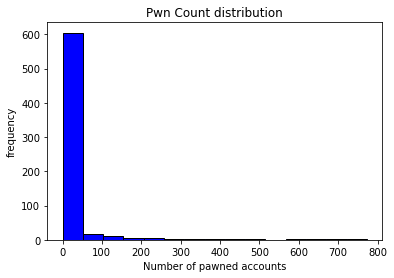

In [106]:
# Plot histogram and comment on the skewness
plt.hist(pwnCountInMil, color='blue', edgecolor='black', bins=bin_count)
plt.title("Pwn Count distribution")
plt.xlabel("Number of pawned accounts")
plt.ylabel("frequency")
plt.show()

PwnCount data follow a skewed distribution. This is a positive skew as median (1.0) < mean (19.0).

### Visualise using sns.histplot

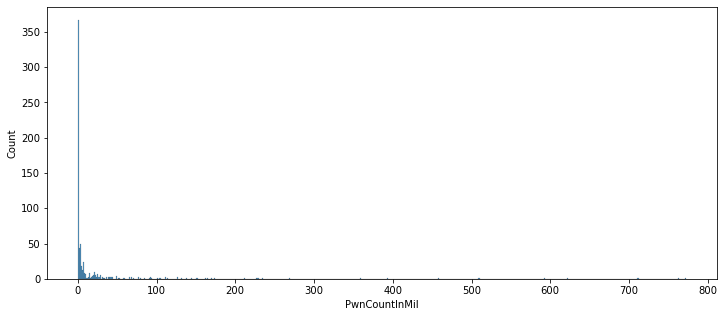

In [107]:
plt.figure(figsize=(12,5))
sns.histplot(x=df['PwnCountInMil'], data=df)
plt.show()

### Visualise using plot(kind='box')

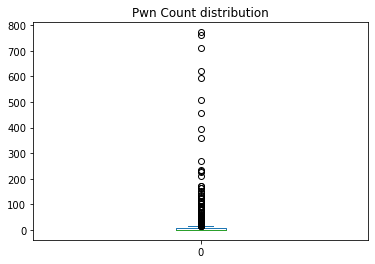

In [108]:
# Plot a box and whiskers plot to visualise age data
pwn_count_df = pd.DataFrame(pwnCountInMil)
pwn_count_df.plot(kind='box', title='Pwn Count distribution')
plt.show()

### Visualise using sns.boxplot

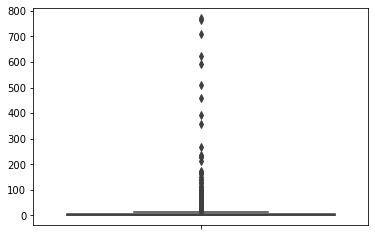

In [109]:
sns.boxplot(y=pwnCountInMil)
plt.show()

## Review trends & seasonality - Visualise Pwned Count by Breach Date

In [1]:
# Create a preprocessing function to transform the date data
def preprocessing(df):
    # Convert date column from object to date
    df["BreachDate"] = pd.to_datetime(df["BreachDate"])
    df["AddedDate"] = pd.to_datetime(df["AddedDate"])
    df["ModifiedDate"] = pd.to_datetime(df["ModifiedDate"])
    df['Year'] = df['BreachDate'].dt.year
    df['Month'] = df['BreachDate'].dt.month
    df["Quarter"] = df['BreachDate'].dt.quarter
    
preprocessing(df)

NameError: name 'df' is not defined

In [111]:
df.dtypes

Name                     object
Title                    object
Domain                   object
BreachDate       datetime64[ns]
AddedDate        datetime64[ns]
ModifiedDate     datetime64[ns]
PwnCount                  int64
Description              object
LogoPath                 object
DataClasses              object
IsVerified                 bool
IsFabricated               bool
IsSensitive                bool
IsRetired                  bool
IsSpamList                 bool
IsMalware                  bool
PwnCountInMil             int64
Year                      int64
Month                     int64
Quarter                   int64
dtype: object

In [112]:
# Check year
print(len(df["Year"].unique()), df["Year"].unique())

17 [2015 2020 2012 2016 2011 2018 2017 2022 2014 2021 2013 2019 2023 2008
 2010 2009 2007]


### Observation
There are 17 unique year values in the dataset

### Pawned Count by Breach Date

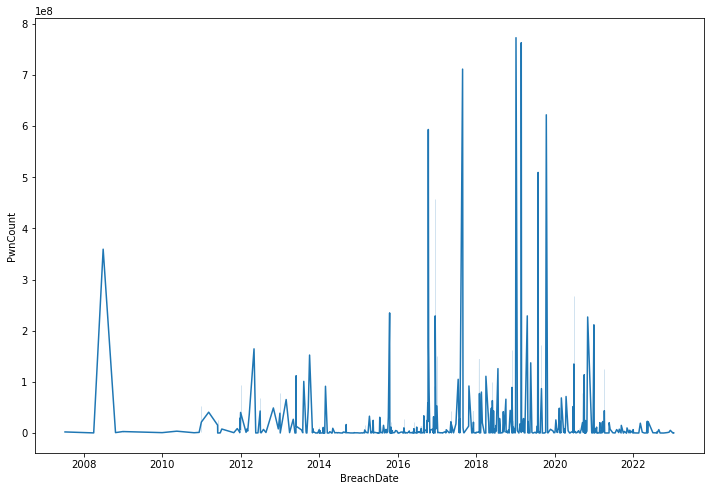

In [113]:
plt.figure(figsize=(12,8))
sns.lineplot(x="BreachDate", y="PwnCount", data=df)
plt.show()

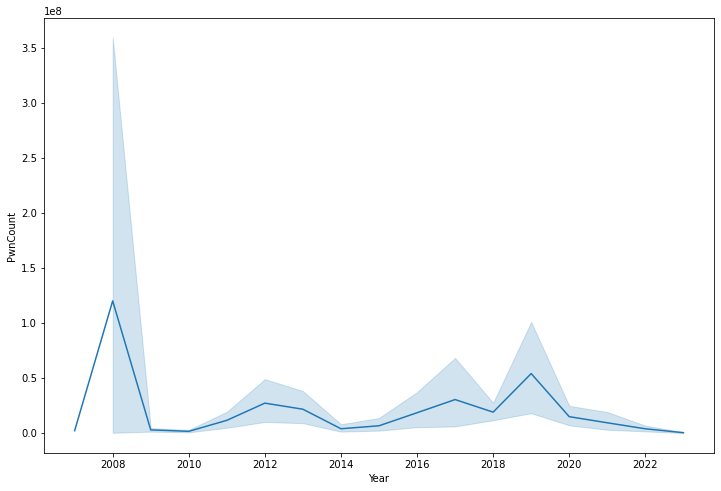

In [114]:
plt.figure(figsize=(12,8))
sns.lineplot(x="Year", y="PwnCount", data=df)
plt.show()

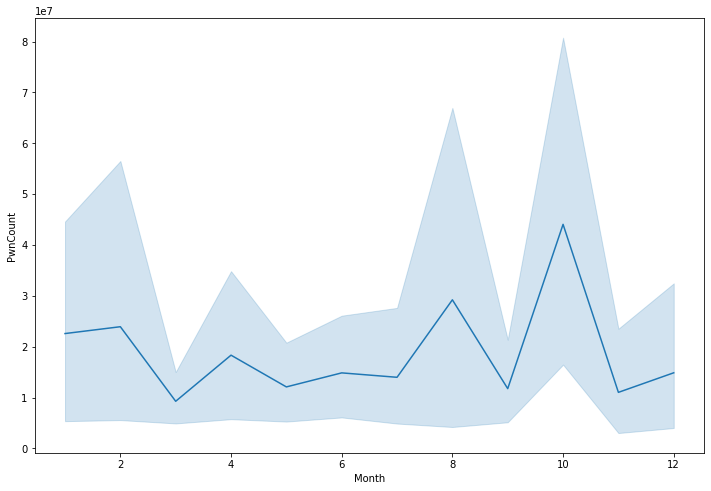

In [115]:
plt.figure(figsize=(12,8))
sns.lineplot(x="Month", y="PwnCount", data=df)
plt.show()

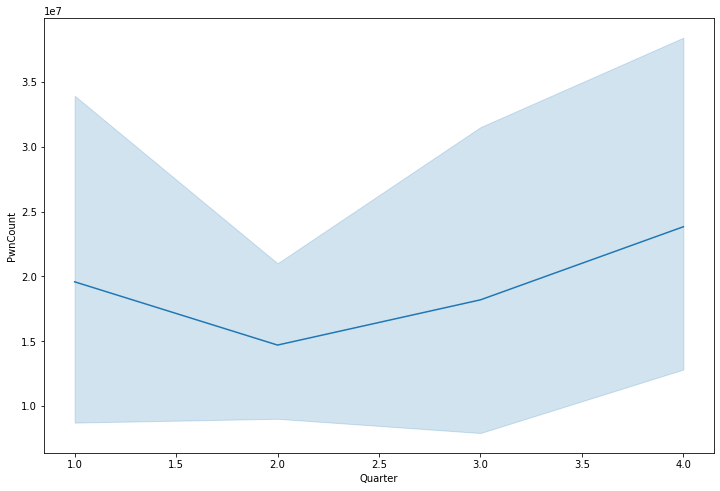

In [116]:
plt.figure(figsize=(12,8))
sns.lineplot(x="Quarter", y="PwnCount", data=df)
plt.show()

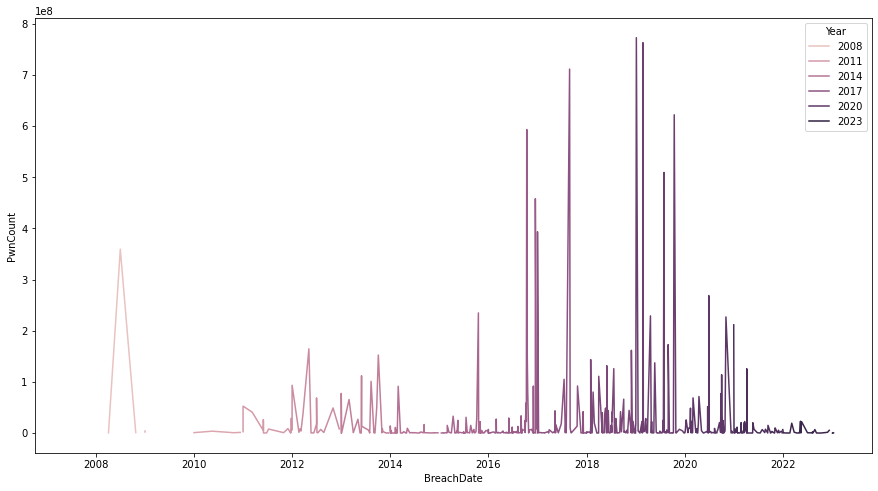

In [117]:
# Lineplot
plt.figure(figsize=(15,8))
sns.lineplot(x="BreachDate", y="PwnCount", hue="Year",estimator=None, data=df)
plt.show()

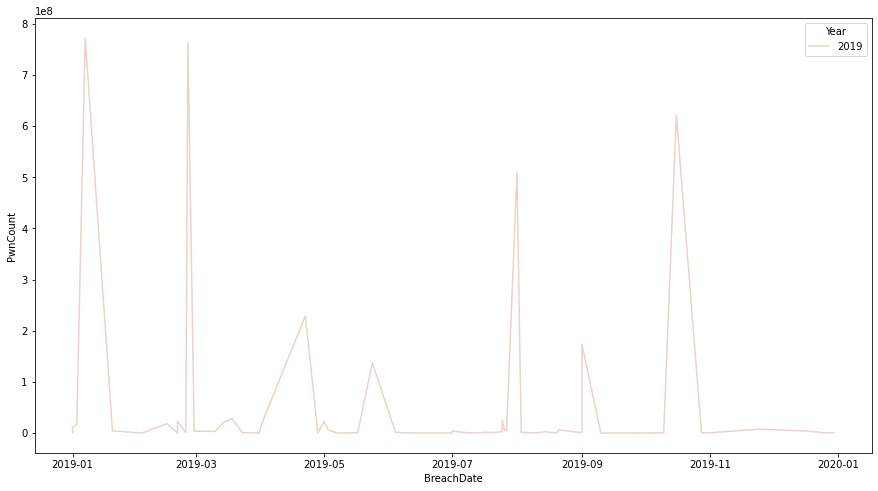

In [118]:
# Lineplot for year 2019
plt.figure(figsize=(15,8))
sns.lineplot(x="BreachDate", y="PwnCount", hue="Year",estimator=None, data=df[df['Year']==2019])
plt.show()

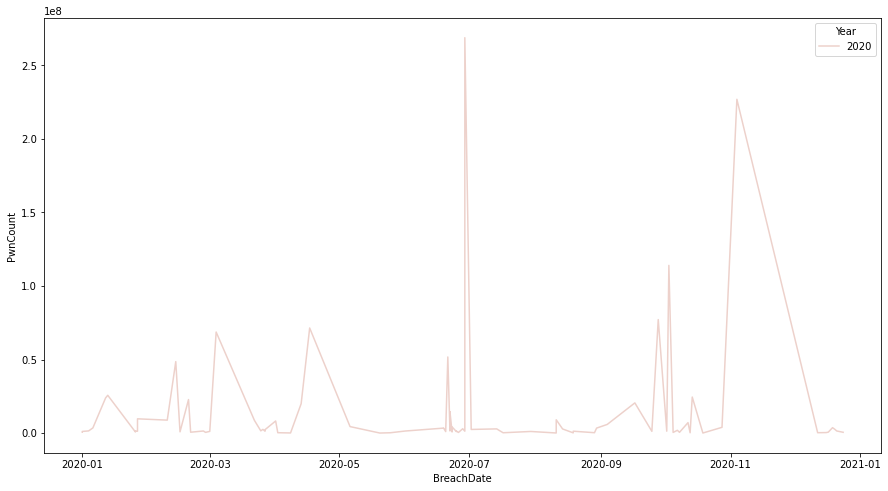

In [119]:
# Lineplot for year 2020
plt.figure(figsize=(15,8))
sns.lineplot(x="BreachDate", y="PwnCount", hue="Year",estimator=None, data=df[df['Year']==2020])
plt.show()

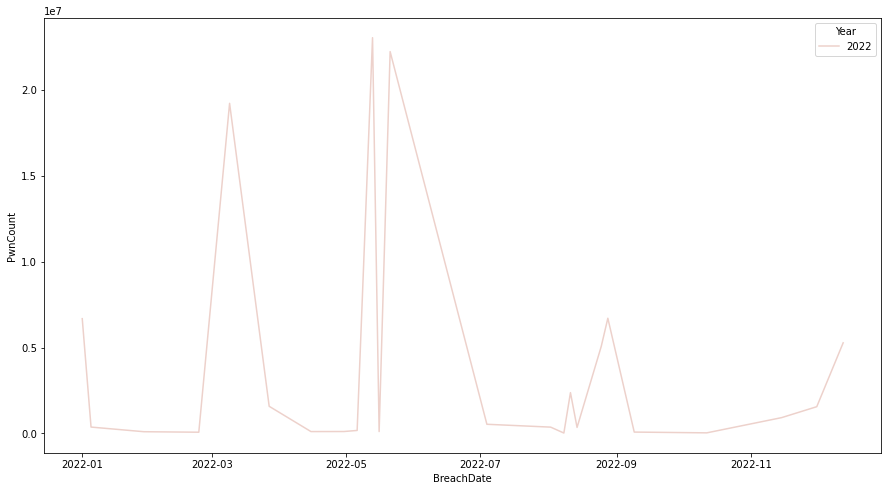

In [120]:
# Lineplot for year 2022
plt.figure(figsize=(15,8))
sns.lineplot(x="BreachDate", y="PwnCount", hue="Year",estimator=None, data=df[df['Year']==2022])
plt.show()

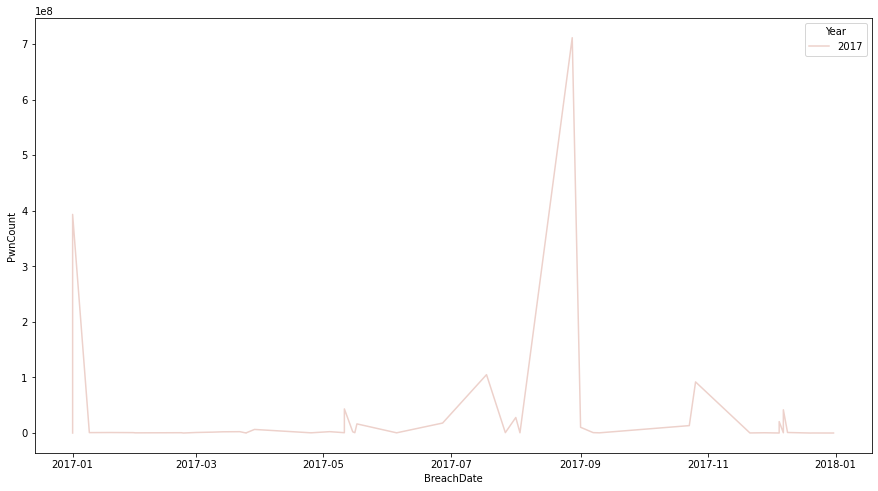

In [121]:
# Lineplot for year 2017
plt.figure(figsize=(15,8))
sns.lineplot(x="BreachDate", y="PwnCount", hue="Year",estimator=None, data=df[df['Year']==2017])
plt.show()

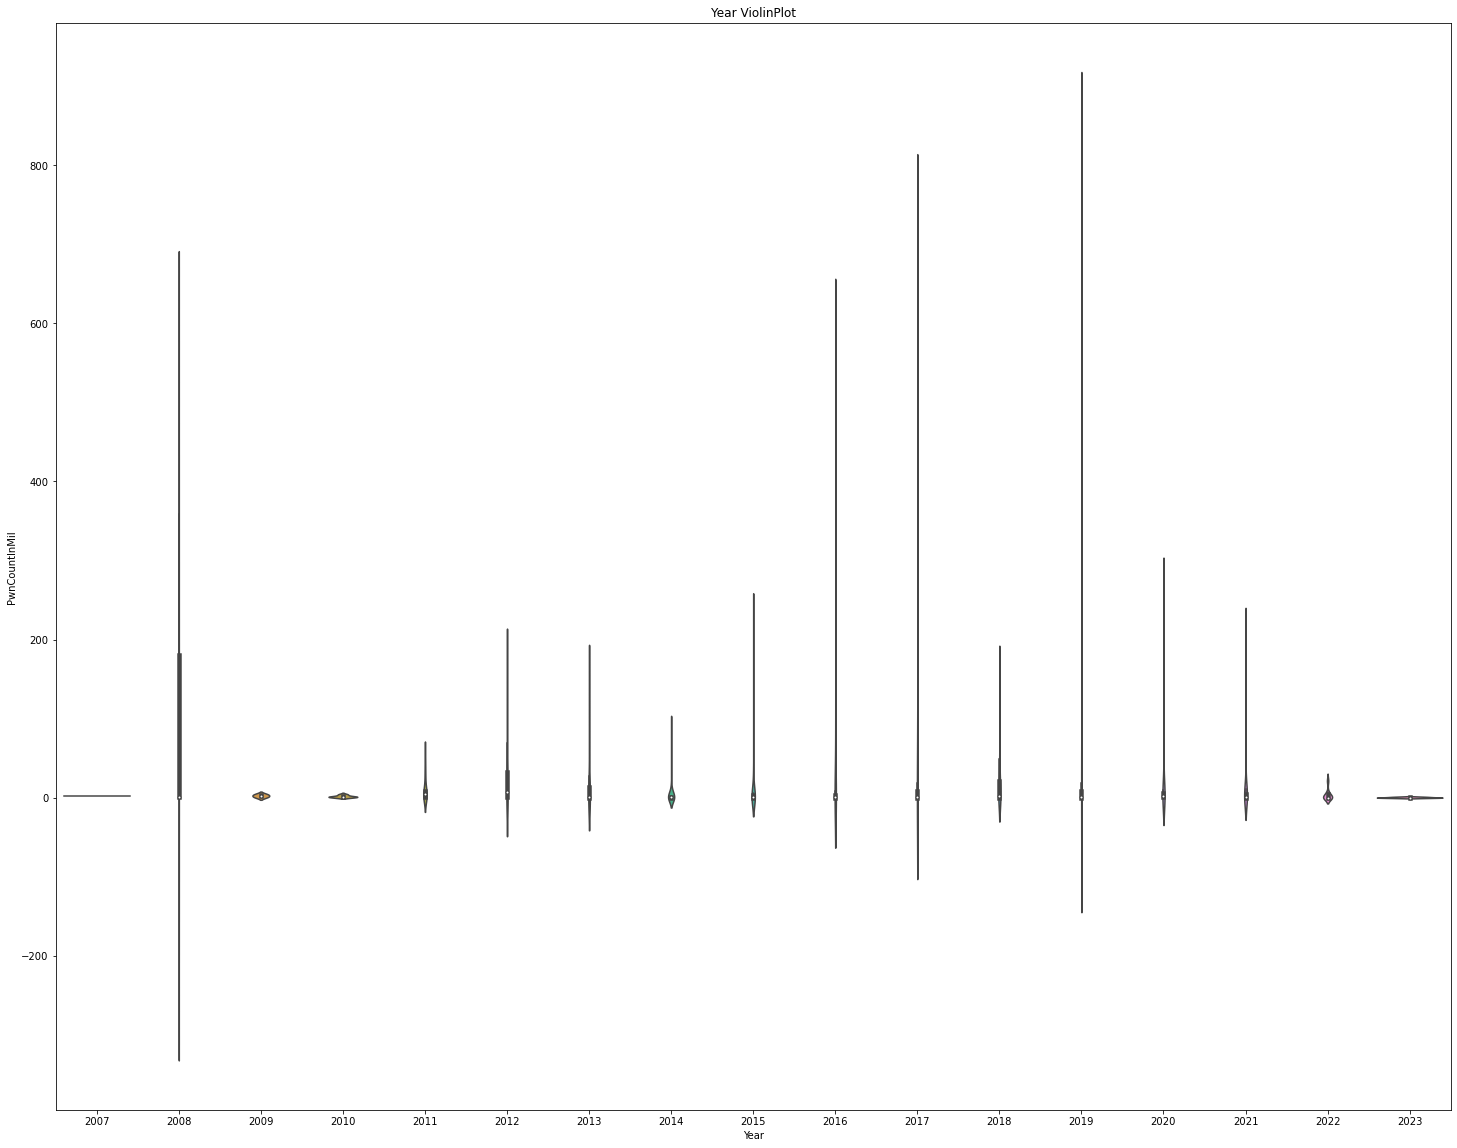

In [122]:
plt.figure(figsize=(25,20))
sns.violinplot(x='Year', y='PwnCountInMil', data=df).set_title('Year ViolinPlot')
plt.show()

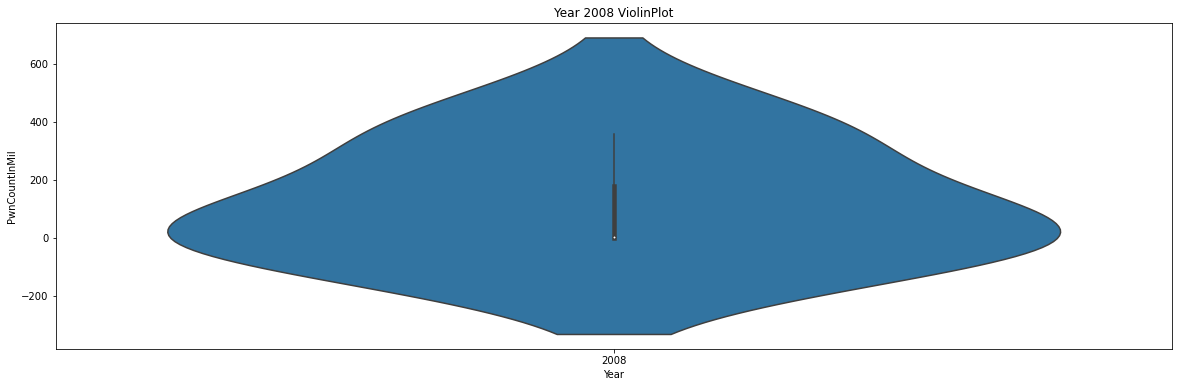

In [123]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Year', y='PwnCountInMil', data=df[df['Year']==2008]).set_title('Year 2008 ViolinPlot')
plt.show()

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           650 non-null    object        
 1   Title          650 non-null    object        
 2   Domain         624 non-null    object        
 3   BreachDate     650 non-null    datetime64[ns]
 4   AddedDate      650 non-null    datetime64[ns]
 5   ModifiedDate   650 non-null    datetime64[ns]
 6   PwnCount       650 non-null    int64         
 7   Description    650 non-null    object        
 8   LogoPath       650 non-null    object        
 9   DataClasses    650 non-null    object        
 10  IsVerified     650 non-null    bool          
 11  IsFabricated   650 non-null    bool          
 12  IsSensitive    650 non-null    bool          
 13  IsRetired      650 non-null    bool          
 14  IsSpamList     650 non-null    bool          
 15  IsMalware      650 non-

### Sort PwnCount in descending order

In [125]:
df_sorted = df.sort_values('PwnCount', ascending=False)
df_sorted[['BreachDate', 'PwnCount']].head(10)

,BreachDate,PwnCount
125,2019-01-07,772904991
587,2019-02-25,763117241
411,2017-08-28,711477622
146,2019-10-16,622161052
203,2016-10-13,593427119
206,2019-08-01,509458528
38,2016-12-16,457962538
479,2017-01-01,393430309
384,2008-07-01,359420698
603,2020-06-29,268765495


In [126]:
df.corr()

,PwnCount,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,PwnCountInMil,Year,Month,Quarter
PwnCount,1.000000,-0.202759,0.006963,-0.037340,-0.007492,0.184703,-0.007151,0.999993,0.005944,0.006502,0.022187
IsVerified,-0.202759,1.000000,-0.179200,-0.070398,0.009644,0.032234,0.019332,-0.202747,0.136775,-0.011274,-0.003207
IsFabricated,0.006963,-0.179200,1.000000,0.143982,-0.002673,-0.008934,-0.005358,0.006887,-0.032550,-0.005626,-0.006664
IsSensitive,-0.037340,-0.070398,0.143982,1.000000,-0.011815,-0.039493,0.118867,-0.037520,0.004086,-0.057607,-0.063770
IsRetired,-0.007492,0.009644,-0.002673,-0.011815,1.000000,-0.005150,-0.003089,-0.007375,-0.027557,0.051651,0.053691
IsSpamList,0.184703,0.032234,-0.008934,-0.039493,-0.005150,1.000000,0.142193,0.184587,-0.015958,0.025857,0.022124
IsMalware,-0.007151,0.019332,-0.005358,0.118867,-0.003089,0.142193,1.000000,-0.007437,0.076964,-0.028509,-0.030767
PwnCountInMil,0.999993,-0.202747,0.006887,-0.037520,-0.007375,0.184587,-0.007437,1.000000,0.005890,0.006485,0.022173
Year,0.005944,0.136775,-0.032550,0.004086,-0.027557,-0.015958,0.076964,0.005890,1.000000,-0.079542,-0.080824
Month,0.006502,-0.011274,-0.005626,-0.057607,0.051651,0.025857,-0.028509,0.006485,-0.079542,1.000000,0.972720


In [127]:
# Heatmap
# plt.figure(figsize=(20,6))
# sns.heatmap(df.corr())
# plt.show()

In [128]:
df['PwnCount'].corr(df['IsSpamList'], method='pearson')

0.1847029193061936

In [129]:
df['PwnCount'].corr(df['IsSpamList'], method='spearman')

0.16149170236366897

## Descriptive Statistics of Nominal Data

In [130]:
nominal_col = ['IsVerified', 'IsFabricated', 'IsSensitive', 'IsRetired', 'IsSpamList', 'IsMalware']

for i in nominal_col:
    print(df[i].value_counts(normalize=True))

True     0.943077
False    0.056923
Name: IsVerified, dtype: float64
False    0.995385
True     0.004615
Name: IsFabricated, dtype: float64
False    0.916923
True     0.083077
Name: IsSensitive, dtype: float64
False    0.998462
True     0.001538
Name: IsRetired, dtype: float64
False    0.983077
True     0.016923
Name: IsSpamList, dtype: float64
False    0.993846
True     0.006154
Name: IsMalware, dtype: float64


### Visualise nominal data using plot.bar()

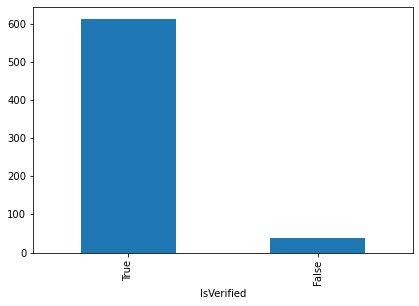

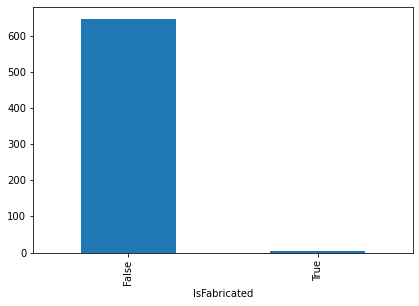

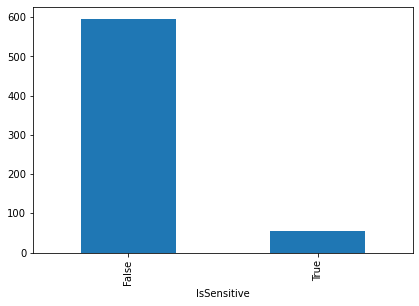

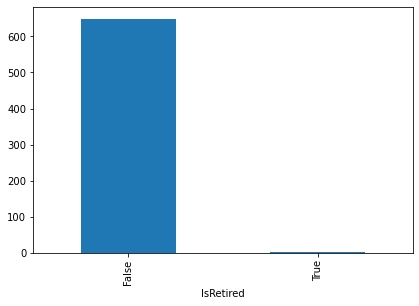

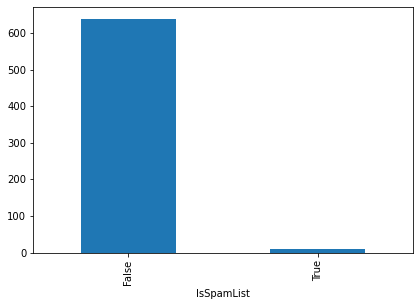

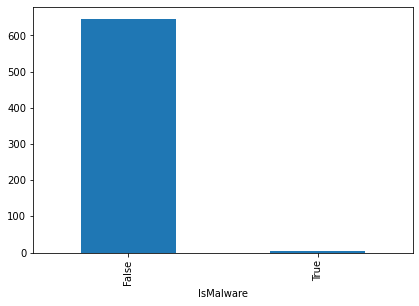

In [131]:
def bar_chart():
    for i in nominal_col:
        fig1, ax1 = plt.subplots(nrows=1, ncols=1)
        fig1.tight_layout()
        ax1 = df[i].value_counts().plot.bar()
        ax1.set_xlabel(i)
        plt.show()
bar_chart()

### Visualise nominal data using sns.countplot

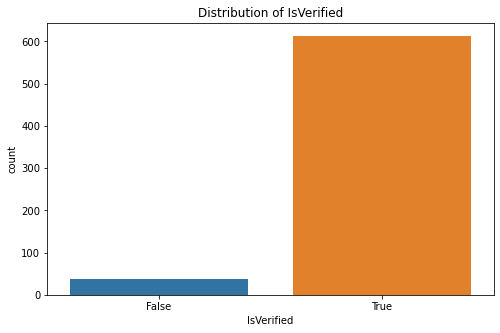

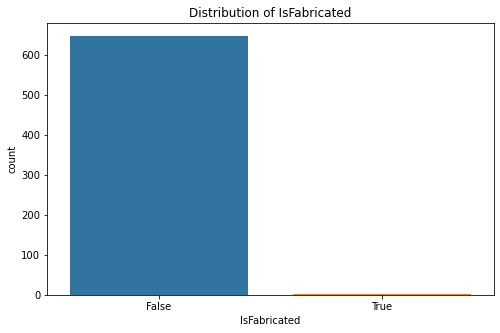

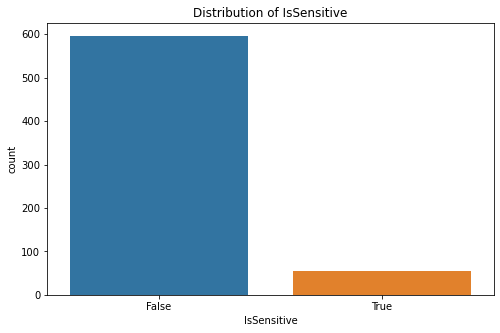

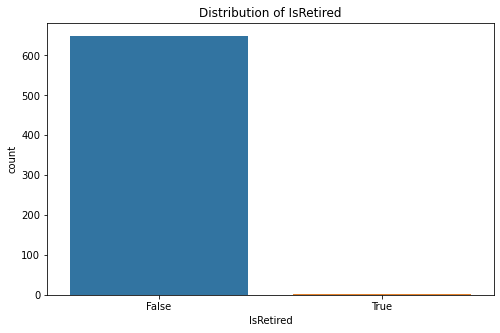

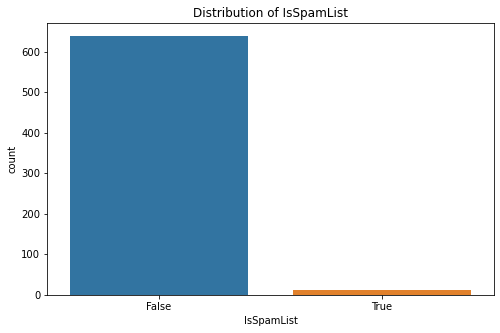

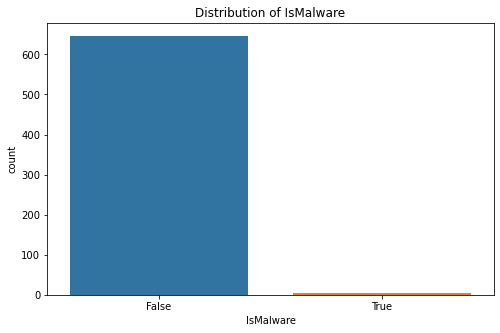

In [132]:
def countplot():
    for col in nominal_col:
        plt.figure(figsize=(8,5))
        plt.title('Distribution of '+ col)
        sns.countplot(x=col, data=df,)
        plt.show()
countplot()

# 3. Data Preparation

## Missing values in Domain column - replace with Name + .com

In [133]:
# Count of rows with Nan domain
df['Domain'].isna().sum()

26

In [134]:
# Check percentage
df['Domain'].isnull().sum() / df.shape[0]

0.04

In [135]:
# Number of unique values in Domain column
len(df['Domain'].unique()) # Check this before creating a countplot

609

In [136]:
# Create a dataframe with Domain = Nan
df_domain_nan = pd.DataFrame(df.loc[df['Domain'].isna()==True])
df_domain_nan.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,PwnCountInMil,Year,Month,Quarter
5,2844Breaches,"2,844 Separate Data Breaches",NaN,2018-02-19,2018-02-19,2018-02-19,80115532,"In February 2018, <a href=""https://www.troyhun...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False,80,2018,2,1
38,AntiPublic,Anti Public Combo List,NaN,2016-12-16,2016-12-16,2016-12-16,457962538,"In December 2016, a huge list of email address...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False,458,2016,12,4
56,B2BUSABusinesses,B2B USA Businesses,NaN,2017-07-18,2017-07-18,2017-07-18,105059554,"In mid-2017, a spam list of over 105 million i...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Employers', 'Job titles',...",True,False,False,False,True,False,105,2017,7,3
125,Collection1,Collection #1,NaN,2019-01-07,2019-01-07,2019-01-07,772904991,"In January 2019, a large collection of credent...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False,773,2019,1,1
128,CouponMomAndArmorGames,Coupon Mom / Armor Games,NaN,2014-02-08,2014-02-08,2014-02-08,11010525,"In 2014, a file allegedly containing data hack...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False,11,2014,2,1


In [137]:
df_domain_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 5 to 637
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           26 non-null     object        
 1   Title          26 non-null     object        
 2   Domain         0 non-null      object        
 3   BreachDate     26 non-null     datetime64[ns]
 4   AddedDate      26 non-null     datetime64[ns]
 5   ModifiedDate   26 non-null     datetime64[ns]
 6   PwnCount       26 non-null     int64         
 7   Description    26 non-null     object        
 8   LogoPath       26 non-null     object        
 9   DataClasses    26 non-null     object        
 10  IsVerified     26 non-null     bool          
 11  IsFabricated   26 non-null     bool          
 12  IsSensitive    26 non-null     bool          
 13  IsRetired      26 non-null     bool          
 14  IsSpamList     26 non-null     bool          
 15  IsMalware      26 non-nu

In [138]:
# Update NaN values to Name + '.com'
df_domain_nan['Domain'] = df_domain_nan['Name'].apply(lambda x: x + '.com')
df_domain_nan['Domain'].values

array(['2844Breaches.com', 'AntiPublic.com', 'B2BUSABusinesses.com',
       'Collection1.com', 'CouponMomAndArmorGames.com',
       'CrimeAgencyVBulletin.com', 'PDL.com', 'DataEnrichment.com',
       'ElasticsearchSalesLeads.com', 'Emotet.com', 'Estonia.com',
       'Experian2020.com', 'ExploitIn.com', 'VINs.com', 'KayoMoe.com',
       'LeadHunter.com', 'MasterDeeds.com', 'NamelessMalware.com',
       'NotAcxiom.com', 'OnlinerSpambot.com', 'RedLineStealer.com',
       'SaverSpy.com', 'SuperVPNGeckoVPN.com', 'TrikSpamBotnet.com',
       'WienerBuchereien.com', 'YouveBeenScraped.com'], dtype=object)

In [139]:
# Replace values in Domain value in main df
df.loc[df['Domain'].isna()==True,'Domain'] = df_domain_nan['Domain'].values

# Double check values in Domain column (index is from the df_domain_nan.head() before the update)
df.iloc[[5,38,56,125,128]]

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,PwnCountInMil,Year,Month,Quarter
5,2844Breaches,"2,844 Separate Data Breaches",2844Breaches.com,2018-02-19,2018-02-19,2018-02-19,80115532,"In February 2018, <a href=""https://www.troyhun...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False,80,2018,2,1
38,AntiPublic,Anti Public Combo List,AntiPublic.com,2016-12-16,2016-12-16,2016-12-16,457962538,"In December 2016, a huge list of email address...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False,458,2016,12,4
56,B2BUSABusinesses,B2B USA Businesses,B2BUSABusinesses.com,2017-07-18,2017-07-18,2017-07-18,105059554,"In mid-2017, a spam list of over 105 million i...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Employers', 'Job titles',...",True,False,False,False,True,False,105,2017,7,3
125,Collection1,Collection #1,Collection1.com,2019-01-07,2019-01-07,2019-01-07,772904991,"In January 2019, a large collection of credent...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False,773,2019,1,1
128,CouponMomAndArmorGames,Coupon Mom / Armor Games,CouponMomAndArmorGames.com,2014-02-08,2014-02-08,2014-02-08,11010525,"In 2014, a file allegedly containing data hack...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False,11,2014,2,1


## Clean Data Classes column

In [140]:
# Find and Count Unique Values in a Column
df.DataClasses.value_counts()

['Email addresses', 'IP addresses', 'Passwords', 'Usernames']                                                                                                               77
['Email addresses', 'Passwords', 'Usernames']                                                                                                                               64
['Email addresses', 'Passwords']                                                                                                                                            58
['Dates of birth', 'Email addresses', 'IP addresses', 'Passwords', 'Usernames']                                                                                             12
['Dates of birth', 'Email addresses', 'IP addresses', 'Passwords', 'Usernames', 'Website activity']                                                                          9
                                                                                                                             

In [141]:
df.DataClasses.unique()

array(["['Email addresses', 'IP addresses', 'Names', 'Passwords']",
       "['Email addresses', 'IP addresses', 'Names', 'Passwords', 'Phone numbers', 'Physical addresses', 'Usernames']",
       "['Email addresses', 'Passwords']",
       "['Device information', 'Email addresses', 'IP addresses', 'Passwords', 'Usernames']",
       "['Email addresses', 'Passwords', 'Usernames']",
       "['Dates of birth', 'Email addresses', 'Genders', 'Geographic locations', 'Names', 'Passwords', 'Usernames']",
       "['Email addresses', 'Genders', 'Geographic locations', 'IP addresses', 'Names', 'Passwords']",
       "['Email addresses', 'IP addresses', 'Passwords', 'Usernames']",
       "['Dates of birth', 'Email addresses', 'IP addresses', 'Passwords', 'Usernames']",
       "['Email addresses', 'IP addresses']",
       "['Email addresses', 'Employers', 'Job titles', 'Names', 'Phone numbers', 'Physical addresses', 'Social media profiles']",
       "['Email addresses', 'Genders', 'Geographic locations

In [142]:
# Create a panda Series - each row is a numpy array of data classes
data_classes = df["DataClasses"].apply(lambda x: np.array(eval(x)), 0)

In [143]:
data_classes

0      [Email addresses, IP addresses, Names, Passwords]
1      [Email addresses, IP addresses, Names, Passwor...
2                           [Email addresses, Passwords]
3      [Device information, Email addresses, IP addre...
4                [Email addresses, Passwords, Usernames]
                             ...                        
645    [Dates of birth, Email addresses, Genders, Nam...
646    [Email addresses, Passwords, Phone numbers, Us...
647              [Email addresses, Passwords, Usernames]
648    [Dates of birth, Email addresses, Genders, Geo...
649    [Email addresses, Names, Phone numbers, Userna...
Name: DataClasses, Length: 650, dtype: object

In [144]:
data_classes_counts = {}

for key, value in data_classes.items():
    for i in value:
        if i not in data_classes_counts.keys():
            data_classes_counts[i] = 1
        else:
            data_classes_counts[i] += 1

In [145]:
# Check count of individual data class in the dictionary
data_classes_counts

{'Email addresses': 644,
 'IP addresses': 278,
 'Names': 304,
 'Passwords': 511,
 'Phone numbers': 187,
 'Physical addresses': 149,
 'Usernames': 346,
 'Device information': 12,
 'Dates of birth': 170,
 'Genders': 127,
 'Geographic locations': 89,
 'Employers': 25,
 'Job titles': 25,
 'Social media profiles': 38,
 'Marital statuses': 15,
 'Income levels': 12,
 'Purchases': 34,
 'Religions': 8,
 'Salutations': 11,
 'Password hints': 1,
 'Races': 1,
 'Relationship statuses': 4,
 'Sexual orientations': 7,
 'Spoken languages': 16,
 'Partial dates of birth': 4,
 'Website activity': 77,
 'Address book contacts': 1,
 'Apps installed on devices': 1,
 'Cellular network names': 1,
 'IMEI numbers': 2,
 'IMSI numbers': 2,
 'Profile photos': 6,
 'Private messages': 31,
 'Education levels': 10,
 'Job applications': 5,
 'Nationalities': 7,
 'Email messages': 8,
 'Homepage URLs': 2,
 'Instant messenger identities': 8,
 'Ages': 2,
 'Auth tokens': 9,
 'Employment statuses': 1,
 'Browser user agent detai

In [146]:
len(data_classes_counts)

135

In [147]:
# Iterate through dictionary
next(iter(data_classes_counts))

'Email addresses'

In [148]:
# Check insertion ordering in dict
# print(f'Keys: {list(data_classes_counts.keys())}\n')
# print(f'Values: {list(data_classes_counts.values())}\n')
# print(f'Items: {list(data_classes_counts.items())}\n')
# print(f'Last item inserted: {list(data_classes_counts.popitem())}\n')

### Create a new dataframe for data classes

In [149]:
data = {'DataClass': list(data_classes_counts.keys()),
        'Count': list(data_classes_counts.values())
        }
df_dataclasses = pd.DataFrame.from_dict(data)
df_dataclasses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DataClass  135 non-null    object
 1   Count      135 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [150]:
df_dataclasses.head()

,DataClass,Count
0,Email addresses,644
1,IP addresses,278
2,Names,304
3,Passwords,511
4,Phone numbers,187


In [151]:
# Sort df based on Count
df_dataclasses = df_dataclasses.sort_values('Count', ascending=False)
df_dataclasses.head(10)

,DataClass,Count
0,Email addresses,644
3,Passwords,511
6,Usernames,346
2,Names,304
1,IP addresses,278
4,Phone numbers,187
8,Dates of birth,170
5,Physical addresses,149
9,Genders,127
10,Geographic locations,89


In [152]:
# Calculate the frequency of data classes across all breaches
import math
df_dataclasses['Percentage'] = df_dataclasses['Count'].apply(lambda x: round(x/650*100,2))
df_dataclasses.head(10)

,DataClass,Count,Percentage
0,Email addresses,644,99.08
3,Passwords,511,78.62
6,Usernames,346,53.23
2,Names,304,46.77
1,IP addresses,278,42.77
4,Phone numbers,187,28.77
8,Dates of birth,170,26.15
5,Physical addresses,149,22.92
9,Genders,127,19.54
10,Geographic locations,89,13.69


In [153]:
df_dataclasses.tail(10)

,DataClass,Count,Percentage
89,Purchasing habits,1,0.15
91,School grades (class levels),1,0.15
92,Encrypted keys,1,0.15
93,Mnemonic phrases,1,0.15
94,Professional skills,1,0.15
54,Beauty ratings,1,0.15
20,Races,1,0.15
19,Password hints,1,0.15
101,Recovery email addresses,1,0.15
134,Reward program balances,1,0.15


In [154]:
df_dataclasses.dtypes

DataClass      object
Count           int64
Percentage    float64
dtype: object

In [155]:
df_dataclasses.describe()

,Count,Percentage
count,135.000000,135.000000
mean,25.748148,3.960148
std,86.390965,13.291600
min,1.000000,0.150000
25%,1.000000,0.150000
50%,2.000000,0.310000
75%,8.000000,1.230000
max,644.000000,99.080000


**Observation**

- 99.08% of all breaches in the dataset have email addresses compromised
- 78.62% of all breaches in the dataset have passwords compromised 

In [156]:
# from pathlib import Path  
# filepath = Path('dataclasses_classify.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# df_dataclasses.to_csv(filepath, index=False)

### Count of DataClasses compromised in each breach

In [157]:
# Create new column that counts number of data classes in each row
# Convert string to numpy array and check count of each array in DataClasses column
df["DataClassesCount"] = df["DataClasses"].apply(lambda x: np.array(eval(x)), 0).apply(lambda x: x.size)
df.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,...,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,PwnCountInMil,Year,Month,Quarter,DataClassesCount
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-03-01,2015-03-01,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,False,False,False,False,False,15,2015,3,1,4
1,123RF,123RF,123rf.com,2020-03-22,2020-03-22,2020-03-22,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,False,False,False,False,False,9,2020,3,1,7
2,126,126,126.com,2012-01-01,2012-01-01,2012-01-01,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",...,False,False,False,False,False,6,2012,1,1,2
3,17Media,17,17app.co,2016-04-19,2016-04-19,2016-04-19,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",...,False,False,False,False,False,4,2016,4,2,5
4,17173,17173,17173.com,2011-12-28,2011-12-28,2011-12-28,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",...,False,False,False,False,False,7,2011,12,4,3


In [158]:
# Check unique count of DataClassesCount
df["DataClassesCount"].value_counts()

4     145
5      91
3      88
6      81
2      69
7      54
8      44
9      19
10     17
11     11
12      8
1       7
13      5
16      3
20      2
15      2
19      1
25      1
14      1
17      1
Name: DataClassesCount, dtype: int64

**Observation**

From the above result, we can conclude that most incidents involve the breaches of 4 different data classes. Interestingly, 1 incident involves the breaches of 17 different data classes.

## Clean Description column

In [159]:
link = 'In approximately March 2015, the free web hosting provider <a href="http://www.troyhunt.com/2015/10/breaches-traders-plain-text-passwords.html" target="_blank" rel="noopener">000webhost suffered a major data breach</a> that exposed almost 15 million customer records. The data was sold and traded before 000webhost was alerted in October. The breach included names, email addresses and plain text passwords.'

In [160]:
# Attributed to https://stackoverflow.com/questions/8153823/how-to-fix-this-attributeerror
from html.parser import HTMLParser
class MLStripper(HTMLParser):
    def __init__(self):
        # initialize the base class
        HTMLParser.__init__(self)

    def read(self, data):
        # clear the current output before re-use
        self._lines = []
        # re-set the parser's state before re-use
        self.reset()
        self.feed(data)
        return ''.join(self._lines)

    def handle_data(self, d):
        self._lines.append(d)

def strip_tags(html):
    s = MLStripper()
    return s.read(html)


def get_link(html):
    s = MLStripper()
    return s.handle_starttag(html)

In [161]:
df['DescriptionClean'] = df['Description'].apply(lambda x: strip_tags(x))

In [162]:
df['DescriptionClean'][3]

'In April 2016, customer data obtained from the streaming app known as "17" appeared listed for sale on a Tor hidden service marketplace. The data contained over 4 million unique email addresses along with IP addresses, usernames and passwords stored as unsalted MD5 hashes.'

### Text Extraction and Cleanup

In [163]:
import re

def clean_text(text):
    
    if text !="":
        # Remove special characters replace them with spaces
        text = re.sub(r'[^\w\s]', '', text)

        # Remove apostrophes followed by "s" 
        text = re.sub(r"'s\b", '', text)
        
        # Remove non-English characters
        text = ''.join(idx for idx in text if not re.findall("[^\u0000-\u05C0\u2100-\u214F]+", idx))

        # Match any Russian characters using the Cyrillic script range
        russian_pattern = re.compile('[\u0400-\u04FF]+')
        
        # Replace the Russian characters with an empty string
        text = re.sub(russian_pattern, '', text)
        
        # Remove word that contains number
        text = re.sub(r'\w*\d\w*', '', text).strip()
        
        # Remove digits
        text = re.sub(r'[0-9]+', '', text)
        
        # Remove characters that are not a-z or A-Z
        text = re.sub(r'[^a-zA-Z]', ' ', text)
        
        # Remove leading and trailing spaces and any remaining consecutive spaces
        text = re.sub(r'\s+', ' ', text.strip())
        
        return text
    else:
        return ""

In [164]:
# df['DescClean'] = df['DescriptionClean'].apply(lambda x: clean_text(x))
# description_list = df['DescClean'].tolist()
# description_list

### Text Pre-processing

In [165]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

# Function to process text, input is a list
def process_text(texts: list):
    
    processed = []
        
    for text in texts:
        
        # lowercase
        text = text.lower()

        #remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        #remove stopwords
        stop_words = set(stopwords.words('english'))

        #tokenize
        tokens = word_tokenize(text)
        new_text = [i for i in tokens if not i in stop_words]

        new_text = ' '.join(new_text)

        processed.append(new_text)    

    return processed

In [166]:
# description = process_text(description_list)
# description

### Make word cloud

In [167]:
def make_wordcloud(new_text):
    '''function to make wordcloud'''
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(new_text) 

    
    fig = plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
    return fig

In [168]:
# cloud = make_wordcloud(''.join(description))

### Get website link

In [169]:
# Import BeautifulSoup module
from bs4 import BeautifulSoup 

def GetHTMLLink(text):
    
    # Parsing
    soup = BeautifulSoup(text, 'html.parser') 

    # Find <a> tag that has a href attr
    a_tag = soup.find('a', href=True) 
    if a_tag is not None:
        return a_tag['href']
    else:
        return None

In [170]:
df['WebsiteLink'] = df['Description'].apply(lambda x: GetHTMLLink(x))

In [171]:
df[df['WebsiteLink'].isna()]

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,...,IsRetired,IsSpamList,IsMalware,PwnCountInMil,Year,Month,Quarter,DataClassesCount,DescriptionClean,WebsiteLink
27,Aimware,Aimware,aimware.net,2019-04-28,2019-04-28,2019-04-28,305470,"In mid-2019, the video game cheats website &qu...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords...",...,False,False,False,0,2019,4,2,6,"In mid-2019, the video game cheats website ""Ai...",None
88,Boxee,Boxee,forums.boxee.com,2014-03-29,2014-03-29,2014-03-29,158093,"In March 2014, the home theatre PC software ma...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Geograp...",...,False,False,False,0,2014,3,1,10,"In March 2014, the home theatre PC software ma...",None
102,CardingMafiaDec2021,Carding Mafia (December 2021),cardmafia.cc,2021-12-28,2021-12-28,2021-12-28,303877,"In December 2021, the Carding Mafia forum suff...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords...",...,False,False,False,0,2021,12,4,4,"In December 2021, the Carding Mafia forum suff...",None
103,CardingMafia,Carding Mafia (March 2021),cardmafia.cc,2021-03-18,2021-03-18,2021-03-18,297744,"In March 2021, the Carding Mafia forum suffere...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords...",...,False,False,False,0,2021,3,1,4,"In March 2021, the Carding Mafia forum suffere...",None
154,DevilTorrents,Devil-Torrents.pl,devil-torrents.pl,2021-01-04,2021-01-04,2021-01-04,63451,"In early 2021, the Polish torrents website Dev...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",...,False,False,False,0,2021,1,1,2,"In early 2021, the Polish torrents website Dev...",None
159,DivXSubTitles,DivX SubTitles,divxsubtitles.net,2010-01-01,2010-01-01,2010-01-01,783058,"In approximately 2010, the now defunct website...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",...,False,False,False,1,2010,1,1,3,"In approximately 2010, the now defunct website...",None
291,Interpals,InterPals,interpals.net,2015-11-04,2015-11-04,2015-11-04,3439414,"In late 2015, the online penpal site InterPals...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Geograp...",...,False,False,False,3,2015,11,4,6,"In late 2015, the online penpal site InterPals...",None
357,MechoDownload,Mecho Download,mechodownload.com,2013-10-31,2013-10-31,2013-10-31,437928,"In October 2013, the (now defunct) downloads w...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords...",...,False,False,False,0,2013,10,4,4,"In October 2013, the (now defunct) downloads w...",None
363,MinecraftWorldMap,Minecraft World Map,minecraftworldmap.com,2016-01-15,2016-01-15,2016-01-15,71081,"In approximately January 2016, the Minecraft W...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords...",...,False,False,False,0,2016,1,1,4,"In approximately January 2016, the Minecraft W...",None
399,Nihonomaru,Nihonomaru,nihonomaru.net,2015-12-01,2015-12-01,2015-12-01,1697282,"In late 2015, the anime community known as Nih...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords...",...,False,False,False,2,2015,12,4,4,"In late 2015, the anime community known as Nih...",None


### Observation

In [172]:
df['WebsiteLink'].isna().sum()

15

There are 15 rows without a link to a webpage with info about the breach

In [173]:
# from pathlib import Path  
# filepath = Path('Text-Analysis/dftext.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# df_text.to_csv(filepath, index=False)

## One-hot encode the binary nominal columns

In [174]:
encoded_df = pd.get_dummies(df, columns=nominal_col, drop_first=True)

In [175]:
encoded_df.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,...,Quarter,DataClassesCount,DescriptionClean,WebsiteLink,IsVerified_True,IsFabricated_True,IsSensitive_True,IsRetired_True,IsSpamList_True,IsMalware_True
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-03-01,2015-03-01,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,1,4,"In approximately March 2015, the free web host...",http://www.troyhunt.com/2015/10/breaches-trade...,1,0,0,0,0,0
1,123RF,123RF,123rf.com,2020-03-22,2020-03-22,2020-03-22,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,1,7,"In March 2020, the stock photo site 123RF suff...",https://www.bleepingcomputer.com/news/security...,1,0,0,0,0,0
2,126,126,126.com,2012-01-01,2012-01-01,2012-01-01,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",...,1,2,"In approximately 2012, it's alleged that the C...",http://126.com,0,0,0,0,0,0
3,17Media,17,17app.co,2016-04-19,2016-04-19,2016-04-19,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",...,2,5,"In April 2016, customer data obtained from the...",http://motherboard.vice.com/read/another-day-a...,1,0,0,0,0,0
4,17173,17173,17173.com,2011-12-28,2011-12-28,2011-12-28,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",...,4,3,"In late 2011, a series of data breaches in Chi...",https://news.softpedia.com/news/China-Investig...,0,0,0,0,0,0


In [176]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               650 non-null    object        
 1   Title              650 non-null    object        
 2   Domain             650 non-null    object        
 3   BreachDate         650 non-null    datetime64[ns]
 4   AddedDate          650 non-null    datetime64[ns]
 5   ModifiedDate       650 non-null    datetime64[ns]
 6   PwnCount           650 non-null    int64         
 7   Description        650 non-null    object        
 8   LogoPath           650 non-null    object        
 9   DataClasses        650 non-null    object        
 10  PwnCountInMil      650 non-null    int64         
 11  Year               650 non-null    int64         
 12  Month              650 non-null    int64         
 13  Quarter            650 non-null    int64         
 14  DataClasse

In [177]:
# from pathlib import Path  
# filepath = Path('Text-Analysis/cleandescription.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# encoded_df.to_csv(filepath, index=False) 

## Create new dataframe with only numerical columns for Linear Regression model

In [178]:
# Convert to str datatype for categorical values
def convert_to_string():
    encoded_df['Year'] = encoded_df['Year'].astype(str)
    encoded_df['Month'] = encoded_df['Month'].astype(str)
    encoded_df["Quarter"] = encoded_df['Quarter'].astype(str)
convert_to_string()

In [179]:
encoded_df.dtypes

Name                         object
Title                        object
Domain                       object
BreachDate           datetime64[ns]
AddedDate            datetime64[ns]
ModifiedDate         datetime64[ns]
PwnCount                      int64
Description                  object
LogoPath                     object
DataClasses                  object
PwnCountInMil                 int64
Year                         object
Month                        object
Quarter                      object
DataClassesCount              int64
DescriptionClean             object
WebsiteLink                  object
IsVerified_True               uint8
IsFabricated_True             uint8
IsSensitive_True              uint8
IsRetired_True                uint8
IsSpamList_True               uint8
IsMalware_True                uint8
dtype: object

### Create new dataframe for linear regression model

In [180]:
# Create new dataframe for linear regression
df_linregress = pd.DataFrame(encoded_df, 
                             columns=['Year', 'Month', 'Quarter',
                                      'IsVerified_True', 
                                      'IsFabricated_True',  
                                      'IsSensitive_True', 
                                      'IsRetired_True', 
                                      'IsSpamList_True',
                                      'IsMalware_True', 
                                      'DataClassesCount', 'PwnCount'])
df_linregress.head()

,Year,Month,Quarter,IsVerified_True,IsFabricated_True,IsSensitive_True,IsRetired_True,IsSpamList_True,IsMalware_True,DataClassesCount,PwnCount
0,2015,3,1,1,0,0,0,0,0,4,14936670
1,2020,3,1,1,0,0,0,0,0,7,8661578
2,2012,1,1,0,0,0,0,0,0,2,6414191
3,2016,4,2,1,0,0,0,0,0,5,4009640
4,2011,12,4,0,0,0,0,0,0,3,7485802


In [181]:
df_linregress.dtypes

Year                 object
Month                object
Quarter              object
IsVerified_True       uint8
IsFabricated_True     uint8
IsSensitive_True      uint8
IsRetired_True        uint8
IsSpamList_True       uint8
IsMalware_True        uint8
DataClassesCount      int64
PwnCount              int64
dtype: object

### Export df_linregress to new csv file

In [182]:
# from pathlib import Path  
# filepath = Path('Text-Analysis/linregress.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# df_linregress.to_csv(filepath, index=False) 